In [1]:
import os,sys
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)

In [2]:
from plotAnalysisCombinations import getPlot,getCombination,getLlhds

### Define parameters  for analysis combination

In [3]:
slhafile = os.path.expanduser("~/smodels/inputFiles/slha/gluino_squarks.slha")
parfile = os.path.expanduser("~/smodels/mypars.ini")

setup = {'expected' : False,'normalize' : False,
          'murange' : (0.,3.0), 'nmu' : 200}

### Get combination and likelihoods

In [4]:
combiner = getCombination(slhafile, parfile)
muvals,llhdDict = getLlhds(combiner, setup)

In [5]:
muhat = combiner.muhat()
lmax = combiner.lmax()
lsm = combiner.lsm()
lbsm = combiner.likelihood(mu=1.0)

### Plot likelihoods

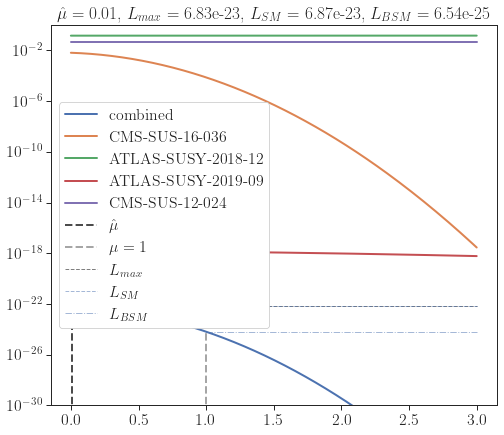

In [6]:
fig = plt.figure(figsize=(8,7))
ymin = 0.
ymax = 0.
for anaID,l in llhdDict.items():
    plt.plot(muvals,l,label=anaID,linewidth=2)
    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
plt.vlines(muhat,ymin=ymin,ymax=lmax,linestyle='--',linewidth=2,
           label=r'$\hat{\mu}$',color='black',alpha=0.7)
plt.vlines(1.0,ymin=ymin,ymax=lbsm,linestyle='--',linewidth=2,
           label=r'$\mu=1$',color='gray',alpha=0.7)


plt.hlines(lmax,xmin=muhat,xmax=max(muvals),linestyle='--',linewidth=1,
           label=r'$L_{max}$',alpha=0.5,color='black')
plt.hlines(lsm,xmin=0.0,xmax=max(muvals),linestyle='--',linewidth=1,
           label=r'$L_{SM}$',alpha=0.5)
plt.hlines(lbsm,xmin=1.0,xmax=max(muvals),linestyle='-.',linewidth=1,
           label=r'$L_{BSM}$',alpha=0.5)


plt.yscale('log')
plt.ylim(1e-30,1)
plt.legend(framealpha=1)
plt.title(r'$\hat{\mu} = $ %1.2f, $L_{max} =$ %1.2e, $L_{SM} =$ %1.2e, $L_{BSM} =$ %1.2e' %(muhat,lmax,lsm,lbsm))
plt.show()